Application of ARIMA Model

In [ ]:
from google.colab import files
files.upload()

Saving gs.us (2).txt to gs.us (2).txt


{'gs.us (2).txt': b'Date,Open,High,Low,Close,Volume,OpenInt\r\n1999-05-04,67.665,68.78,62.329,62.659,24472946,0\r\n1999-05-05,62.213,62.213,58.991,61.547,8295140,0\r\n1999-05-06,60.542,61.773,59.712,60.488,3185852,0\r\n1999-05-07,60.488,66.671,59.429,65.998,5331091,0\r\n1999-05-10,65.331,65.441,62.549,62.941,2839054,0\r\n1999-05-11,62.329,63.389,61.885,62.888,2017182,0\r\n1999-05-12,63.216,66.671,61.547,65.441,2915697,0\r\n1999-05-13,65.222,67,64.555,65.166,1253094,0\r\n1999-05-14,63.444,64.329,61.491,62.497,2256860,0\r\n1999-05-17,61.547,62.549,60.542,61.098,2275059,0\r\n1999-05-18,60.77,62.714,60.662,61.098,1542762,0\r\n1999-05-19,61.773,62.158,61.218,61.71,797532,0\r\n1999-05-20,61.939,62.441,60.879,60.879,571013,0\r\n1999-05-21,60.662,61.274,60.107,60.107,1026465,0\r\n1999-05-24,59.656,59.878,57.872,58.154,1636945,0\r\n1999-05-25,57.096,58.71,56.986,57.432,1822679,0\r\n1999-05-26,58.427,59.32,56.146,58.819,1757445,0\r\n1999-05-27,57.872,60.323,57.598,60.323,1338175,0\r\n1999-05-28,

In [ ]:
import pandas as pd

data = pd.read_csv('gs.us (2).txt')
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-05-04,67.665,68.780,62.329,62.659,24472946,0
1,1999-05-05,62.213,62.213,58.991,61.547,8295140,0
2,1999-05-06,60.542,61.773,59.712,60.488,3185852,0
3,1999-05-07,60.488,66.671,59.429,65.998,5331091,0
4,1999-05-10,65.331,65.441,62.549,62.941,2839054,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4661 entries, 0 to 4660
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     4661 non-null   object 
 1   Open     4661 non-null   float64
 2   High     4661 non-null   float64
 3   Low      4661 non-null   float64
 4   Close    4661 non-null   float64
 5   Volume   4661 non-null   int64  
 6   OpenInt  4661 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 255.0+ KB


Check total null values

In [ ]:
data.isna().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

To run the ARIMA model we have to install pmdarima

In [ ]:
!pip install pmdarima
! pip install statsmodels
! pip install statsmodels

     |████████████████████████████████| 1.5MB 4.1MB/s 
     |████████████████████████████████| 9.5MB 16.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


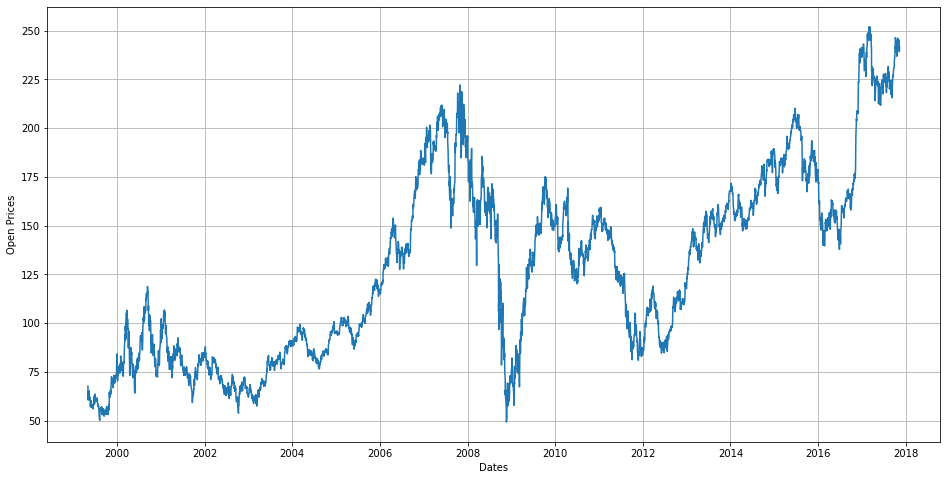

In [ ]:
import matplotlib.pyplot as plt

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('gs.us (2).txt', sep = ',', parse_dates = ['Date'], index_col = 'Date', date_parser = dateparse)
plt.figure(figsize = (16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open']);

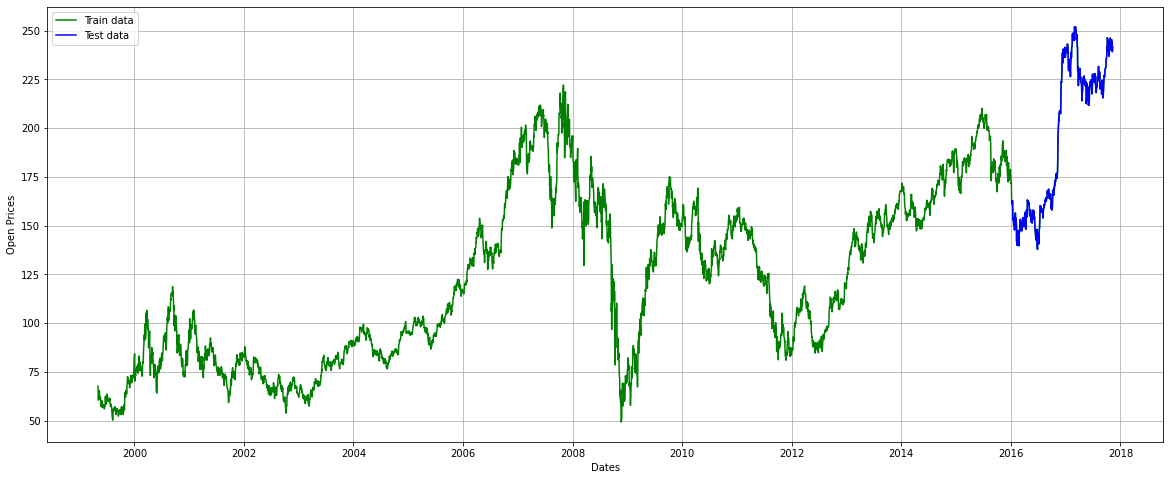

In [ ]:
train_data, test_data = data[0:int(len(data)*0.9)], data[int(len(data)*0.9):]
plt.figure(figsize = (20,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'], 'green', label = 'Train data')  
plt.plot(test_data['Open'], 'blue', label = 'Test data')        
plt.legend()   

In [ ]:
import statsmodels
from pmdarima import auto_arima

stepwise_fet = auto_arima(data['Open'], trace = True, 
                          supress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22738.441, Time=4.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22778.409, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22737.023, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22735.484, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22777.246, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22736.458, Time=1.49 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=22736.667, Time=0.73 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22736.602, Time=4.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=22734.530, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=22735.553, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=22735.744, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=22736.042, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=22735.775, Time=1.38 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 15.171 seconds


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
#Build Model
model = ARIMA(train_data['Open'], order = (0,1,1))
fitted = model.fit(disp = -1)
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                 4193
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -10240.017
Method:                       css-mle   S.D. of innovations              2.782
Date:                Sun, 04 Jul 2021   AIC                          20486.033
Time:                        22:36:14   BIC                          20505.057
Sample:                             1   HQIC                         20492.760
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0240      0.038      0.634      0.526      -0.050       0.098
ma.L1.D.Open    -0.1184      0.016     -7.606      0.000      -0.149      -0.088
                                    Roots   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


<Figure size 1152x576 with 0 Axes>

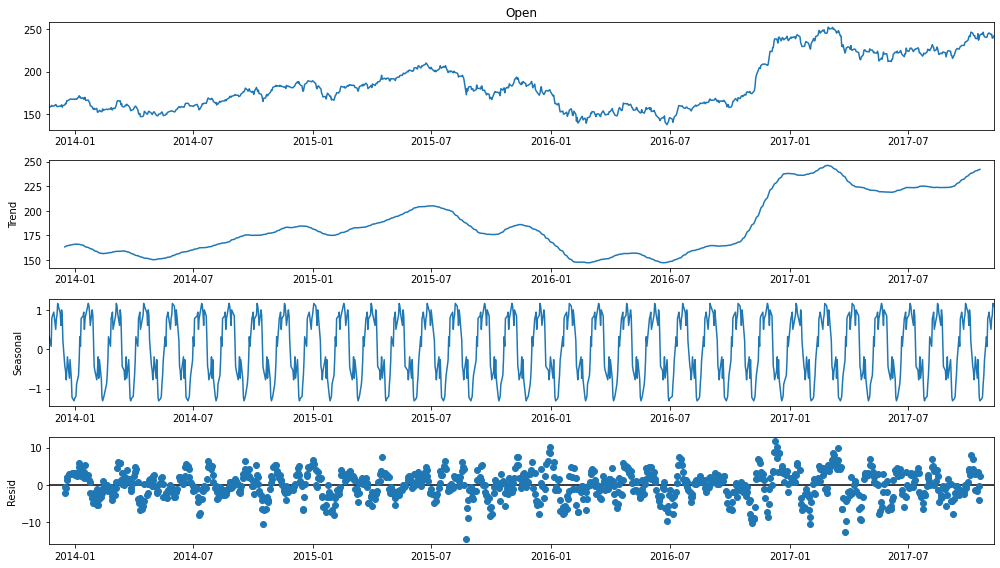

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
data_arima = data['Open']
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_arima[-1000:], model = 'additive', freq = 30)
plt.figure(figsize=(16,8))
fig = result.plot()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

train_arima = train_data['Open']
test_arima = test_data['Open']

history = [x for x in train_arima]
y = test_arima
# make first prediction 
predictions = list()
model = ARIMA(history, order=(0,1,1))
model_fit = model.fit(disp = 0)
ythat = model_fit.forecast()[0]
predictions.append(y[0])
history.append(y[0])
# rolling forecasts

for i in range(1,len(y)):
#predict 
  model = ARIMA(history, order = (0,1,1))
  model_fit = model.fit(disp = 0)
  yhat = model_fit.forecast()[0]
  #invert transformed predictions
  predictions.append(yhat)

  #observation
  obs = y[i]
  history.append(obs)

# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y,predictions))
print('RMSE:'+str(rmse))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


MSE: 7.165530602601614
MAE: 2.0177814713159417
RMSE:2.6768508741806323


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


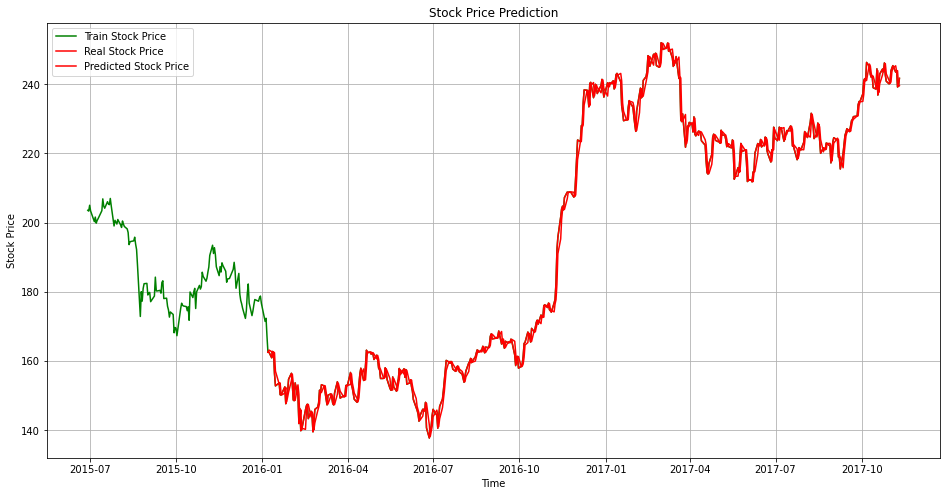

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data.index[-600:], data['Open'].tail(600),color ='green',label = 'Train Stock Price')
plt.plot(test_data.index,y,color='red',label='Real Stock Price')
plt.plot(test_data.index,predictions,color='red',label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()

In [ ]:
predictions

[162.58,
 array([163.21219458]),
 array([162.74760331]),
 array([161.20108482]),
 array([162.63497337]),
 array([162.43268121]),
 array([157.11243962]),
 array([153.36723863]),
 array([153.69065621]),
 array([150.72439732]),
 array([150.27211107]),
 array([150.74950789]),
 array([152.3691533]),
 array([148.26504593]),
 array([149.67531701]),
 array([151.05032417]),
 array([154.34723678]),
 array([156.26144892]),
 array([153.53407337]),
 array([149.33531209]),
 array([148.67833102]),
 array([153.15294107]),
 array([150.44141246]),
 array([142.97337099]),
 array([145.94725717]),
 array([140.62900776]),
 array([140.29424875]),
 array([145.28466435]),
 array([146.91466946]),
 array([147.50328921]),
 array([143.89175199]),
 array([145.35571516]),
 array([144.51327626]),
 array([140.16897626]),
 array([142.18113769]),
 array([145.61278157]),
 array([146.59975698]),
 array([147.7485102]),
 array([151.18522377]),
 array([150.92684291]),
 array([152.95325837]),
 array([152.86475373]),
 array([1

In [ ]:
test_data['Open']

Date
2016-01-07    162.58
2016-01-08    162.66
2016-01-11    160.97
2016-01-12    162.80
2016-01-13    162.38
               ...  
2017-11-06    243.50
2017-11-07    243.91
2017-11-08    239.20
2017-11-09    239.51
2017-11-10    241.69
Name: Open, Length: 467, dtype: float64